# Identifier la fraude chez Enron à l'aide d'e-mails et de données financières

## Présentation du projet

En 2000, Enron était l'une des plus grandes entreprises des États-Unis. En 2002, l'entreprise a fait faillite en raison d'une fraude généralisée au sein de ses activités. Dans l'enquête fédérale qui a suivi, une quantité importante d'informations généralement confidentielles a été rendue publiques, comprenant notamment des dizaines de milliers de courriels et des données financières détaillées concernant les hauts dirigeants. Pour ce projet, des modèles prédictifs ont été construits à l'aide des modules scikit-learn, NumPy et pandas en Python. La cible des prédictions était les personnes d'intérêt (POI), qui sont des individus ayant été inculpés, ayant conclu un règlement ou un accord de plaidoyer avec le gouvernement, ou ayant témoigné en échange d'une immunité de poursuites. Le Corpus Enron a été utilisé comme fonctionnalité de prédiction.

L'objectif de ce projet est de construire un modèle de prédiction pour identifier les personnes d'intérêt (POI).I).

### Étapes du projet :

- [Comprendre l'ensemble de données](#lesson_1)
- [Développer une « théorie prédictive »](#lesson_2)
- [**Étapes 1**: Effectuer une analyse des données de l'ensemble de données Enron](#Étapest_1)

- [Application de la régression](#lesson_2)
- [*ÉtapesT 2** : Enquête sur les valeurs aberrantes](#project_2)

- [Optimiser la sélection/l'ingénierie des fonctionnalités](#lesson_3)
- [*ÉtapesT 3** : Création de nouvelles fonctionnalités](#project_3)

- [Sélection d'algorithmes, comparaison de classificateurs et création de pipelines](#leçon_5)
- [Création de pipelines et vérification des scores pour le meilleur algorithme] (#leçon_6)
- [ÉtapesET 4** : Sélection d'algorithmes et réglage des paramètres](#project_4)

**Importation des bibliothèques nécessaires**

In [1]:
import sys
import pickle
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt
%matplotlib inline

In [2]:
import pickle

enron_data = pickle.load(open("final_project_dataset_modified_unix.pkl", "rb"))

## Comprendre l'ensemble de données

### Exploration des données 

In [3]:
print('Nombre de personnes dans l ensemble de données Enron: {0}'.format(len(enron_data)))

Nombre de personnes dans l ensemble de données Enron: 143


In [4]:
"""Changer le dictionnaire de données en pandas DataFrame"""
df = pd.DataFrame.from_records(list(enron_data.values()))
persons= pd.Series(list(enron_data.keys()))
print(persons.head())
df.head

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object


<bound method NDFrame.head of      salary to_messages deferral_payments total_payments loan_advances  \
0    365788         807               NaN        1061827           NaN   
1    267102         NaN           1295738        5634343           NaN   
2    170941         NaN               NaN         211725           NaN   
3       NaN         764               NaN            NaN           NaN   
4    243293        1045               NaN         288682           NaN   
..      ...         ...               ...            ...           ...   
138     NaN         NaN               NaN         119292           NaN   
139  415189        1892               NaN        1868758           NaN   
140  265214         533            227449        1092663           NaN   
141  278601         865               NaN         875760           NaN   
142  274975         873               NaN        1272284           NaN   

       bonus              email_address restricted_stock_deferred  \
0     600000

In [5]:
pois = [x for x, y in enron_data.items() if y['poi']]
print('Nombre de POI (personnes d intérêt) : {0}'.format(len(pois)))

Nombre de POI (personnes d intérêt) : 16


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     143 non-null    object
 1   to_messages                143 non-null    object
 2   deferral_payments          143 non-null    object
 3   total_payments             143 non-null    object
 4   loan_advances              143 non-null    object
 5   bonus                      143 non-null    object
 6   email_address              143 non-null    object
 7   restricted_stock_deferred  143 non-null    object
 8   deferred_income            143 non-null    object
 9   total_stock_value          142 non-null    object
 10  expenses                   143 non-null    object
 11  from_poi_to_this_person    143 non-null    object
 12  exercised_stock_options    143 non-null    object
 13  from_messages              143 non-null    object
 14  other     

In [7]:
""" Noms de tous les utilisateurs de l'ensemble de données """
enron_data.keys()

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [8]:
enron_data['PRENTICE JAMES']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 564348,
 'total_payments': 564348,
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'james.prentice@enron.com',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 1095040,
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 886231,
 'from_messages': 'NaN',
 'other': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 208809,
 'director_fees': 'NaN'}

In [9]:
enron_data['PRENTICE JAMES']['total_stock_value']

1095040

In [10]:
enron_data['COLWELL WESLEY']['from_this_person_to_poi']

11

In [11]:
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'] 

f = open('poi_names.txt', 'r')


In [12]:
print('Columns:', list(df.columns.values))
print('Shape:', df.shape)
print('Number of POI in the dataset:', (df['poi'] == 1).sum())
print('Number of non-POI in the dataset:', (df['poi'] == 0).sum())

Columns: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
Shape: (143, 21)
Number of POI in the dataset: 16
Number of non-POI in the dataset: 127


In [13]:
df.replace(to_replace='NaN', value=np.nan, inplace=True)
print(df.isnull().sum())

salary                        51
to_messages                   59
deferral_payments            106
total_payments                21
loan_advances                141
bonus                         64
email_address                 34
restricted_stock_deferred    126
deferred_income               96
total_stock_value             20
expenses                      51
from_poi_to_this_person       59
exercised_stock_options       44
from_messages                 59
other                         53
from_this_person_to_poi       59
poi                            0
long_term_incentive           80
shared_receipt_with_poi       59
restricted_stock              36
director_fees                127
dtype: int64



Il y avait 143 enregistrements au total et 16 POI dans l'ensemble de données d'origine.

Toutes les fonctionnalités ont des données nulles.

<hr> </hr>

Les caractéristiques des données se répartissent en trois types principaux, à savoir 
- caractéristiques financières
- fonctionnalités de messageri
e
-Étiquettes de POICaractéristiques financièresres: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'toutes les unités sont en dollars américainsars)

Email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'les unités sont généralement le nombre de messages électroniques ; l'exception notable est « email_address », qui est une chaîne de texteing)

POI label: [‘poi’booléen, représenté sous forme d'entiergerJe vais essayer d'utiliser toutes les fonctionnalités, les filtrer et choisir la meilleure.st.

### Fin du Étapes 1
<hr> </hr>

## Regression (Enquête sur les valeurs aberrantes)

Identifier les valeurs aberrantes dans les données financières et expliquer comment elles sont supprimées ou traitées d'une autre manière.

In [14]:
# Supprimer les colonnes avec plus de 65 valeurs nulles
for column in df.columns:
    if df[column].isnull().sum() > 65:
        df.drop(column, axis=1, inplace=True)

# Supprimer la colonne 'email_address'
if 'email_address' in df.columns:
    df.drop('email_address', axis=1, inplace=True)

    

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   92 non-null     float64
 1   to_messages              84 non-null     float64
 2   total_payments           122 non-null    float64
 3   bonus                    79 non-null     float64
 4   total_stock_value        123 non-null    float64
 5   expenses                 92 non-null     float64
 6   from_poi_to_this_person  84 non-null     float64
 7   exercised_stock_options  99 non-null     float64
 8   from_messages            84 non-null     float64
 9   other                    90 non-null     float64
 10  from_this_person_to_poi  84 non-null     float64
 11  poi                      143 non-null    bool   
 12  shared_receipt_with_poi  84 non-null     float64
 13  restricted_stock         107 non-null    float64
dtypes: bool(1), float64(13)
me

In [16]:
#Imputation des valeurs manquantes
df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)

print(df_imp.isnull().sum())
print(df_imp.head())

df_imp.describe()

salary                     0
to_messages                0
total_payments             0
bonus                      0
total_stock_value          0
expenses                   0
from_poi_to_this_person    0
exercised_stock_options    0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
restricted_stock           0
dtype: int64
     salary  to_messages  total_payments      bonus  total_stock_value  \
0  365788.0        807.0       1061827.0   600000.0           585062.0   
1  267102.0          0.0       5634343.0  1200000.0         10623258.0   
2  170941.0          0.0        211725.0   350000.0          6678735.0   
3       0.0        764.0             0.0        0.0          1038185.0   
4  243293.0       1045.0        288682.0  1500000.0          6391065.0   

   expenses  from_poi_to_this_person  exercised_stock_options  from_messages  \
0   94299.0                     38.0                    

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
count,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000,1.430000e+02,143.000000,143.000000,1.430000e+02
mean,1.714731e+05,1191.972028,1.489942e+06,5.926127e+05,2.404233e+06,34719.447552,37.552448,1.715504e+06,365.118881,2.267385e+05,24.475524,676.384615,7.235235e+05
std,1.660404e+05,2223.860300,2.386745e+06,1.036924e+06,4.422592e+06,45235.547286,74.148184,3.694149e+06,1455.675655,7.552178e+05,80.080666,1066.923179,1.571184e+06
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-4.409300e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-2.604490e+06
25%,0.000000e+00,0.000000,8.929250e+04,0.000000e+00,2.148255e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,2.061210e+05,266.000000,9.114530e+05,2.500000e+05,9.543540e+05,17355.000000,1.000000,6.014380e+05,16.000000,8.910000e+02,0.000000,91.000000,3.466630e+05
75%,2.670975e+05,1504.000000,1.858492e+06,8.000000e+05,2.217787e+06,52688.500000,39.500000,1.636136e+06,50.500000,1.492040e+05,12.500000,869.000000,6.801640e+05
max,1.060932e+06,15149.000000,1.725253e+07,8.000000e+06,3.076606e+07,228763.000000,528.000000,3.076606e+07,14368.000000,7.427621e+06,609.000000,5521.000000,1.384707e+07


In [17]:
### Requêtes de l'ensemble de données ###
enron_data['THE TRAVEL AGENCY IN THE PARK']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 362096,
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 362096,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [18]:
!pip install feature_format

Coefficients: [1.97017287]
Intercept: 662220.4176015807


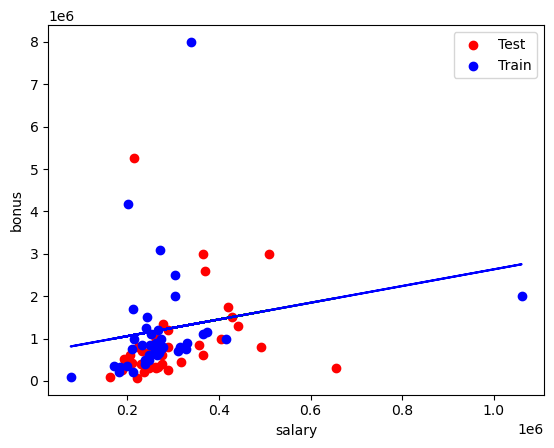

In [19]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Charger les données à partir du fichier pickle
dictionary = pickle.load(open("final_project_dataset_modified_unix.pkl", "rb"))

# Supprimer la ligne correspondant à 'THE TRAVEL AGENCY IN THE PARK'
del dictionary['THE TRAVEL AGENCY IN THE PARK']

# Extraire les caractéristiques et les cibles
features_list = ["bonus", "salary"]
data = []
for key, value in dictionary.items():
    if all(value[feature] != 'NaN' for feature in features_list):
        data.append([value[feature] for feature in features_list])
data = np.array(data)

# Diviser les données en ensembles d'entraînement et de test
features = data[:, 1].reshape(-1, 1)  # Utiliser uniquement la colonne 'salary' comme caractéristique
target = data[:, 0].astype(float)  # Utiliser la colonne 'bonus' comme cible
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

# Créer et entraîner le modèle de régression linéaire
reg = LinearRegression()
reg.fit(feature_train, target_train)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# Visualiser les résultats
plt.scatter(feature_test, target_test, color='r', label='Test')
plt.scatter(feature_train, target_train, color='b', label='Train')
plt.plot(feature_test, reg.predict(feature_test), color='g')
plt.plot(feature_train, reg.predict(feature_train), color='b')
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()


In [20]:
# supprimer une ligne pour 'THE TRAVEL AGENCY IN THE PARK'
park_index = list(enron_data.keys()).index('THE TRAVEL AGENCY IN THE PARK')
print(park_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

98


In [21]:
enron_data['LOCKHART EUGENE E']

{'salary': 'NaN',
 'to_messages': 'NaN',
 'deferral_payments': 'NaN',
 'total_payments': 'NaN',
 'loan_advances': 'NaN',
 'bonus': 'NaN',
 'email_address': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'deferred_income': 'NaN',
 'total_stock_value': 'NaN',
 'expenses': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 'NaN',
 'from_messages': 'NaN',
 'other': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 'NaN',
 'director_fees': 'NaN'}

In [22]:
# supprimer une ligne pour 'LOCKHART EUGENE E'
lockhart_index = list(enron_data.keys()).index('LOCKHART EUGENE E')
print(lockhart_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

89


- 'THE TRAVEL AGENCY IN THE PARK' a été supprimé car ce n'est pas une personne. 
- 'LOCKHART EUGENE E' a été supprimé lors du traitement des données car cette ligne ne contenait aucune entrée pour aucune fonctionnalité.

### Fin du Étapes 2
<hr> </hr>

## Optimiser la sélection/l'ingénierie des fonctionnalités

In [23]:
enron_df = df_imp_sub

### Étudier les caractéristiques financières :

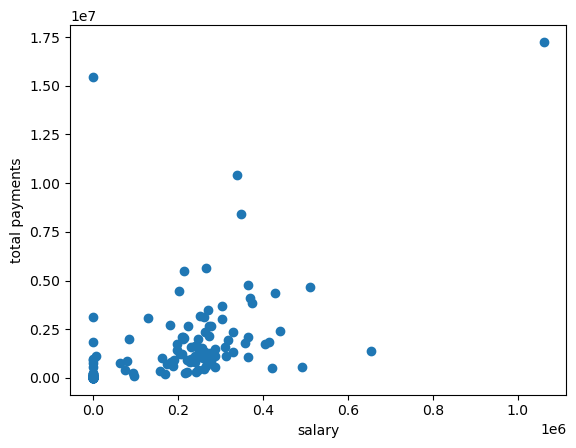

In [24]:
import matplotlib.pyplot as plt
plt.scatter(enron_df['salary'], enron_df['total_payments'])
plt.xlabel("salary")
plt.ylabel("total payments")
plt.show()

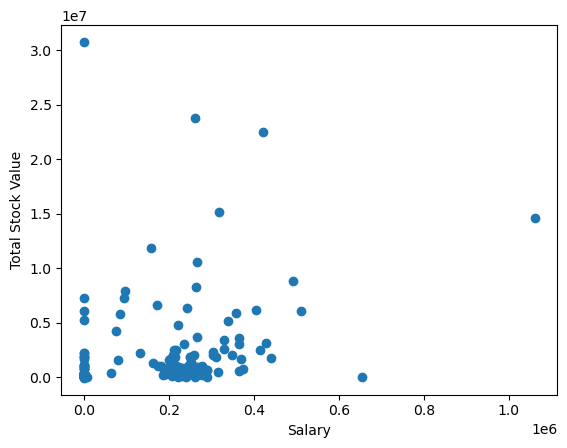

In [25]:
plt.scatter(enron_df['salary'], enron_df['total_stock_value'])
plt.xlabel("Salary")
plt.ylabel("Total Stock Value")
plt.show()

#### Création de nouvelles caractéristiques pour les fonctionnalités financières

In [26]:
enron_df[enron_df['total_stock_value'].isnull()]

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock


In [27]:
"""Créer du nouveau features 'salary_of_total_payments' et 'salary_of_total_stock_value"""
enron_df['salary_of_total_payments'] = 0.0
enron_df['salary_of_total_stock_value'] = 0.0
enron_df.loc[enron_df['total_payments'] !=0.0, 'salary_of_total_payments'] = enron_df['salary']/enron_df['total_payments']*100
enron_df.loc[enron_df['total_stock_value'] != 0.0,'salary_of_total_stock_value'] = enron_df['salary'] / enron_df['total_stock_value']*100


In [28]:
enron_df.head()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value
0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,702.0,585062.0,34.448926,62.521237
1,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,0.0,3942714.0,4.740606,2.514313
2,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,1788391.0,80.737277,2.559482
3,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,58.0,386335.0,0.000000,0.000000
4,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1035.0,853064.0,84.277163,3.806768


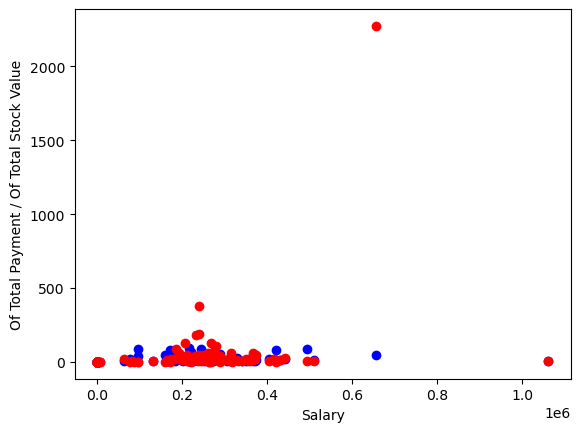

In [29]:
# Graph 'salary_of_total_payment' et 'salary_of_total_stock_value' en salaire
plt.scatter(enron_df['salary'], enron_df['salary_of_total_payments'], color='blue')
plt.scatter(enron_df['salary'], enron_df['salary_of_total_stock_value'], color='red')
plt.xlabel('Salary')
plt.ylabel('Of Total Payment / Of Total Stock Value')
plt.show()

#### Création de nouvelles fonctionnalités pour les fonctionnalités liées au courrier électronique


In [30]:
def outlierCleaner(predictions, ages, net_worths):
    cleaned_Data = []
    for i in range(0, len(predictions)):
        age = ages[i][0]
        new_worth = net_worths[i][0]
        pred = predictions[i][0]
        err = net_worth - pred
        cleaned_data.append((age, net_worth, err))
        
    cleaned_data = sorted(cleaned_data, key=lambda x:x[2], reverse=True)[0:81]
    
    print('length of cleaned_data :', len(cleaned_data))
    return cleaned_data

#### Création d'une colonne 'poi_ratio' pour stocker le ratio des messages liés aux POI (Person Of Interest) en pourcentage.
#### De nouvelles fonctionnalités seront également ajoutées :
- la fraction de tous les e-mails adressés à une **personne** provenant d'une **personne d'intérêt**
- la fraction de tous les e-mails envoyés par une **personne** et adressés à des **personnes d'intérêt**

L'hypothèse derrière ces fonctionnalités est qu'il pourrait y avoir des connexions de courrier électronique plus fortes entre les POI qu'entre les POI et les non-POI, et un **nuage de points** de ces deux fonctionnalités suggère qu'il pourrait y avoir une part de vérité dans cette hypothèse. 

De plus, j'adapte **'salaire'** à une plage [0, 100]

In [31]:
enron_df['poi_ratio'] = 0.0
enron_df['fraction_to_poi'] = 0.0
enron_df['fraction_from_poi'] = 0.0

enron_df.loc[(enron_df['from_messages'] + enron_df['to_messages']) != 0.0, 'poi_ratio'] = (enron_df['from_poi_to_this_person'] + enron_df['from_this_person_to_poi']) / (enron_df['from_messages'] + enron_df['to_messages']) * 100
enron_df.loc[enron_df['from_messages'] != 0.0, 'fraction_to_poi'] = enron_df['from_this_person_to_poi'] / enron_df['from_messages'] * 100
enron_df.loc[enron_df['to_messages'] != 0.0, 'fraction_from_poi']= enron_df['from_poi_to_this_person'] / enron_df['to_messages'] * 100

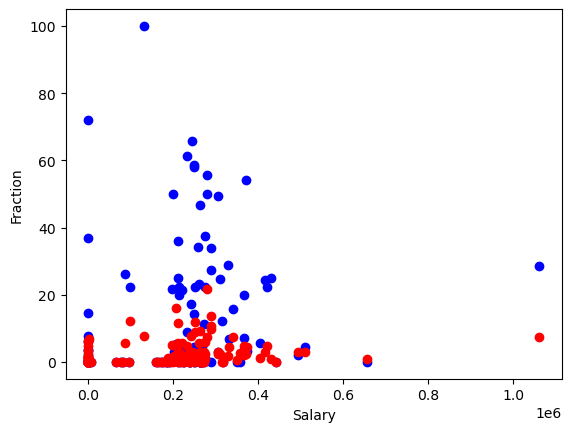

In [32]:
# Graph 'fraction_to_poi' et 'fraction_from_poi' en salaire
plt.scatter(enron_df['salary'], enron_df['fraction_to_poi'], color='blue')
plt.scatter(enron_df['salary'], enron_df['fraction_from_poi'], color='red')
plt.xlabel('Salary')
plt.ylabel('Fraction')
plt.show()

#### Déplacer 'poi' vers la première colonne

In [33]:
cols = enron_df.columns.tolist()
cols = cols[11:12] + cols[:11] + cols[12:]
enron_df = enron_df[cols]

In [34]:
enron_df.columns.values

array(['poi', 'salary', 'to_messages', 'total_payments', 'bonus',
       'total_stock_value', 'expenses', 'from_poi_to_this_person',
       'exercised_stock_options', 'from_messages', 'other',
       'from_this_person_to_poi', 'shared_receipt_with_poi',
       'restricted_stock', 'salary_of_total_payments',
       'salary_of_total_stock_value', 'poi_ratio', 'fraction_to_poi',
       'fraction_from_poi'], dtype=object)

In [35]:
enron_df.head()

,poi,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi
0,False,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,702.0,585062.0,34.448926,62.521237,4.665072,3.448276,4.708798
1,False,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,0.0,3942714.0,4.740606,2.514313,0.000000,0.000000,0.000000
2,False,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,0.0,1788391.0,80.737277,2.559482,0.000000,0.000000,0.000000
3,False,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,58.0,386335.0,0.000000,0.000000,1.288660,0.000000,1.308901
4,True,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1035.0,853064.0,84.277163,3.806768,4.921077,65.625000,3.062201


In [36]:
enron_df.describe()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi
count,1.420000e+02,142.000000,1.420000e+02,1.420000e+02,1.420000e+02,142.000000,142.000000,1.420000e+02,142.000000,1.420000e+02,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.726806e+05,1200.366197,1.497885e+06,5.967860e+05,2.421165e+06,34963.950704,37.816901,1.727585e+06,367.690141,2.257853e+05,24.647887,681.147887,7.286187e+05,15.198587,35.821064,2.844448,10.638415,2.261809
std,1.659968e+05,2229.457770,2.393296e+06,1.039388e+06,4.433593e+06,45300.747867,74.342949,3.704389e+06,1460.502581,7.578048e+05,80.337515,1069.172948,1.575560e+06,20.375767,194.171876,4.312736,18.454284,3.667065
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-4.409300e+04,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-2.604490e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,8.839225e+04,0.000000e+00,2.288695e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,8.115000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.083105e+05,289.000000,9.138250e+05,2.750000e+05,9.551135e+05,18094.500000,2.500000,6.046375e+05,16.500000,8.825000e+02,0.000000,102.500000,3.535955e+05,9.792470,5.889988,0.787407,0.000000,0.297659
75%,2.670998e+05,1513.000000,1.863625e+06,8.000000e+05,2.218031e+06,52905.250000,39.750000,1.636585e+06,51.250000,1.454285e+05,12.750000,871.500000,6.892030e+05,21.593596,22.361452,4.367335,16.995688,3.012120
max,1.060932e+06,15149.000000,1.725253e+07,8.000000e+06,3.076606e+07,228763.000000,528.000000,3.076606e+07,14368.000000,7.427621e+06,609.000000,5521.000000,1.384707e+07,94.795031,2274.591986,22.435175,100.000000,21.734104


In [37]:
enron_df.shape

(142, 19)

In [38]:
enron_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 142
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   poi                          142 non-null    bool   
 1   salary                       142 non-null    float64
 2   to_messages                  142 non-null    float64
 3   total_payments               142 non-null    float64
 4   bonus                        142 non-null    float64
 5   total_stock_value            142 non-null    float64
 6   expenses                     142 non-null    float64
 7   from_poi_to_this_person      142 non-null    float64
 8   exercised_stock_options      142 non-null    float64
 9   from_messages                142 non-null    float64
 10  other                        142 non-null    float64
 11  from_this_person_to_poi      142 non-null    float64
 12  shared_receipt_with_poi      142 non-null    float64
 13  restricted_stock         

### Configuration de label, des features et des prédicteurs  

In [39]:
predictors = enron_df.drop('poi', axis=1).columns.values
print(predictors)

['salary' 'to_messages' 'total_payments' 'bonus' 'total_stock_value'
 'expenses' 'from_poi_to_this_person' 'exercised_stock_options'
 'from_messages' 'other' 'from_this_person_to_poi'
 'shared_receipt_with_poi' 'restricted_stock' 'salary_of_total_payments'
 'salary_of_total_stock_value' 'poi_ratio' 'fraction_to_poi'
 'fraction_from_poi']


### ### Sélection intelligente des features

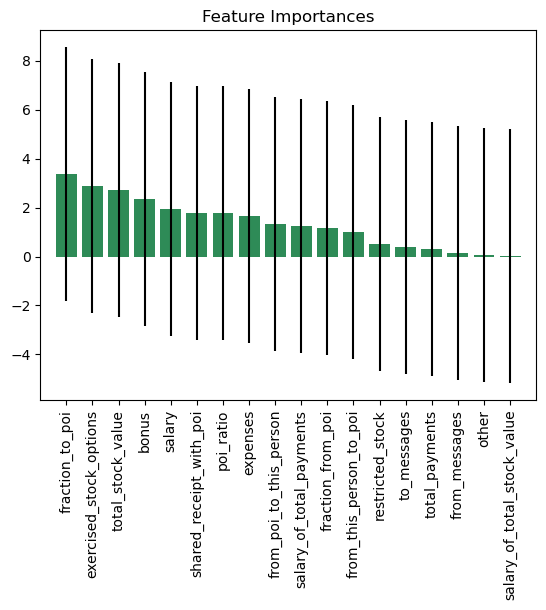

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
%matplotlib inline

selector = SelectKBest(f_classif, k=5)
selector.fit(enron_df[predictors], enron_df['poi'])

scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
sorted_important_features = []
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()


Sur la base de la valeur d'importance triée ci-dessus, suppression des colonnes de valeur d'importance inférieure.
- 'salary_of_total_stock_value', 
- 'other', 
- 'from_messages', 
- 'total_payments', 
- 'to_messages'

In [41]:
# 13 features
predictors = ['bonus', 'exercised_stock_options', 'expenses','from_poi_to_this_person', 'from_this_person_to_poi',
 'restricted_stock', 'salary', 'shared_receipt_with_poi','total_stock_value', 'poi_ratio', 'fraction_to_poi',
 'fraction_from_poi', 'salary_of_total_payments']

# 8 features
predictors_8 = ['bonus', 'exercised_stock_options', 'total_stock_value', 'fraction_to_poi',  'expenses', 'salary',
              'shared_receipt_with_poi', 'poi_ratio']

# 4 features
predictors_4 = ['bonus', 'exercised_stock_options', 'total_stock_value', 'fraction_to_poi']

In [42]:
""" Diviser les données en données de formation et de test. J'utiliserai Stratified Shuffle Split en raison du petit ensemble de données. """
labels = enron_df['poi'].copy(deep=True).astype(int).values  # Modification ici
features = enron_df[predictors].fillna(0).copy(deep=True).values  # Modification ici
print(labels)
print(features)



[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
[[6.00000000e+05 0.00000000e+00 9.42990000e+04 ... 3.44827586e+00
  4.70879802e+00 3.44489262e+01]
 [1.20000000e+06 6.68054400e+06 1.12000000e+04 ... 0.00000000e+00
  0.00000000e+00 4.74060596e+00]
 [3.50000000e+05 4.89034400e+06 7.85520000e+04 ... 0.00000000e+00
  0.00000000e+00 8.07372771e+01]
 ...
 [6.00000000e+05 3.18125000e+06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.42722596e+01]
 [8.00000000e+05 7.65920000e+05 9.62680000e+04 ... 5.00000000e+01
  2.17341040e+01 3.18124829e+01]
 [6.00000000e+05 3.84728000e+05 1.25978000e+05 ... 3.75000000e+01
  5.95647194e+00 2.16127060e+01]]


#### Mise à l'échelle correcte des fonctionnalités
Si l'algorithme nécessite des fonctionnalités mises à l'échelle, la mise à l'échelle des fonctionnalités est déployée.

In [43]:
# scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
# salary_scaled = scaler.fit_transform(enron_df['salary'])


In [44]:
import numpy as np
import sklearn.preprocessing

# Remodeler les données salariales pour les rendre en 2D
salary_2d = enron_df['salary'].values.reshape(-1, 1)

# Initialize and fit the scaler
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
salary_scaled = scaler.fit_transform(salary_2d)


### Fin du projet 3
<hr> </hr>

## Choisir et Tuner un algorithme :

J'utiliserai plusieurs types d'algorithmes et comparerai leurs performances. Le plus performant sera retenu en dernière analyse. 

In [45]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb_clf = GaussianNB()
scores = cross_val_score(gnb_clf, enron_df[predictors_8], labels)
print(scores)
print('GaussianNB mean score:', scores.mean())

#Support Vector Machines
from sklearn.svm import SVC
svc_clf = SVC()
scores = cross_val_score(svc_clf, enron_df[predictors_8], labels)
print(scores)
print('SVC mean score:', scores.mean())

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
scores = cross_val_score(rf_clf, enron_df[predictors_8], labels)
print(scores)
print('RandomForestClassifier mean score:' ,scores.mean())

#Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
erf_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(erf_clf, enron_df[predictors_8], labels)
print(scores)
print('ExtraTressClassifier mean score:', scores.mean())

#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adb_clf, enron_df[predictors_8], labels)
print(scores)
print('AdaBoostClassifier mean score:', scores.mean())

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg_clf = LogisticRegression()
scores = cross_val_score(lreg_clf, enron_df[predictors_8], labels)
print(scores)
print('Logistic Regression mean score:', scores.mean())

#Linear SVC
from sklearn.svm import LinearSVC
lsvc_clf = LinearSVC()
scores = cross_val_score(lsvc_clf, enron_df[predictors_8], labels)
print(scores)
print('Linear SVC mean score:', scores.mean())


[0.86206897 0.82758621 0.85714286 0.78571429 0.78571429]
GaussianNB mean score: 0.8236453201970443
[0.89655172 0.86206897 0.89285714 0.89285714 0.85714286]
SVC mean score: 0.880295566502463
[0.89655172 0.89655172 0.89285714 0.89285714 0.82142857]
RandomForestClassifier mean score: 0.8800492610837438
[0.86206897 0.86206897 0.89285714 0.89285714 0.82142857]
ExtraTressClassifier mean score: 0.8662561576354679
[0.86206897 0.82758621 0.85714286 0.85714286 0.67857143]
AdaBoostClassifier mean score: 0.8165024630541872
[0.79310345 0.68965517 0.78571429 0.82142857 0.75      ]
Logistic Regression mean score: 0.7679802955665025
[0.62068966 0.79310345 0.53571429 0.82142857 0.39285714]
Linear SVC mean score: 0.632758620689655


C:\Users\jdoohdooh\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jdoohdooh\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jdoohdooh\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jdoohdooh\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jdoohdooh\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Comparaison des classificateurs en fonction des scores de validation croisée :
- **1er niveau :** SVC, RandomForestClassifier
- **2ème niveau :** GaussianNB, ExtraTreesClassifier, AdaBoostClassifier
- **3ème niveau :** Régression logistique, LinearSVC
<hr> </hr>

### Sélection de caractéristiques univariées en utilisant l'analyse ANOVA F-test et visualise les scores des caractéristiques sélectionnées
Utilisation de la fonction de sélection par défaut : les 10% de fonctionnalités les plus marquante


<BarContainer object of 13 artists>

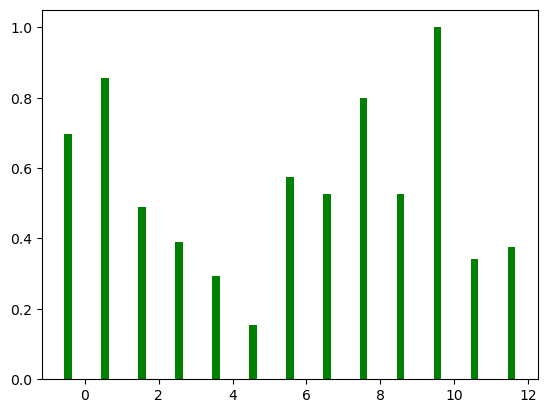

In [46]:
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features, labels)
scores = -np.log(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(features.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,label=r'Univariate score ($-Log(p_[value])&)', color='green')

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

pca = PCA(n_components=8)
selection = SelectKBest(k=4)

#Construire un estimateur à partir de l'ACP et de la sélection univariée :
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

#Utiliser des fonctionnalités combinées pour transformer un ensemble de données :
X_features = combined_features.fit(features, labels).transform(features)

svm = SVC(kernel="linear")
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(features, labels)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1


### Création d'un pipeline qui extrait les fonctionnalités des données à l'aide de PCA et SelectKBest, puis crée un model_SVC

In [48]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV  # Correction de l'importation

#Création feature union
features_pipeline = []
features_pipeline.append(('pca', PCA(n_components=4)))
features_pipeline.append(('select_best', SelectKBest(k=8)))
feature_union = FeatureUnion(features_pipeline)

#Création d'un pipeline pour rbfSVC
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('logistic', LogisticRegression()))
estimators.append(('svc', SVC(kernel='rbf', class_weight='balanced')))
model_svc = Pipeline(estimators)

param_grid = {
            'svc__C': [1e3, 5e3, 1e4, 5e4, 1e5],
            'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1 ],
            'svc__degree': [1, 2, 3, 4, 5]
}

grid_svc = GridSearchCV(model_svc, param_grid)
grid_svc = grid_svc.fit(features, labels)
print(grid_svc.best_estimator_)


Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=4)),
                                                ('select_best',
                                                 SelectKBest(k=8))])),
                ('svc',
                 SVC(C=1000.0, class_weight='balanced', degree=1,
                     gamma=0.0001))])


In [49]:
best_svc_pipe = grid_svc.best_estimator_ 

#Evaluating pipeline for rbfSVC
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
scores_svc = cross_val_score(model_svc, enron_df[predictors], labels, cv=kfold)
print('rbfSVC mean score:', scores_svc.mean())

rbfSVC mean score: 0.8104761904761906


### Création d'un pipeline pour RandomForest :

In [50]:
from sklearn.ensemble import RandomForestClassifier
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('RandomForest', RandomForestClassifier()))
model_rf = Pipeline(estimators)
print(sorted(model_rf.get_params().keys()))


['RandomForest', 'RandomForest__bootstrap', 'RandomForest__ccp_alpha', 'RandomForest__class_weight', 'RandomForest__criterion', 'RandomForest__max_depth', 'RandomForest__max_features', 'RandomForest__max_leaf_nodes', 'RandomForest__max_samples', 'RandomForest__min_impurity_decrease', 'RandomForest__min_samples_leaf', 'RandomForest__min_samples_split', 'RandomForest__min_weight_fraction_leaf', 'RandomForest__n_estimators', 'RandomForest__n_jobs', 'RandomForest__oob_score', 'RandomForest__random_state', 'RandomForest__verbose', 'RandomForest__warm_start', 'feature_union', 'feature_union__n_jobs', 'feature_union__pca', 'feature_union__pca__copy', 'feature_union__pca__iterated_power', 'feature_union__pca__n_components', 'feature_union__pca__n_oversamples', 'feature_union__pca__power_iteration_normalizer', 'feature_union__pca__random_state', 'feature_union__pca__svd_solver', 'feature_union__pca__tol', 'feature_union__pca__whiten', 'feature_union__select_best', 'feature_union__select_best__k

In [51]:
"""Trouver le paramètre le mieux adapté"""
param_grid = {'RandomForest__n_estimators': [10,20,30,40,50],
               'RandomForest__min_samples_split' :[2,3,4,5],
               'RandomForest__min_samples_leaf' : [1,2,3]
             }

grid_rf = GridSearchCV(model_rf, param_grid)
grid_rf = grid_rf.fit(features, labels)
print(grid_rf.best_estimator_)

#Best fitting svc_clf
best_rf_pipe = grid_rf.best_estimator_ 


#Evaluating pipeline for rf
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
scores_rf = cross_val_score(model_rf, enron_df[predictors], labels, cv=kfold)
print('RandomForest mean score:', scores_rf.mean())


Pipeline(steps=[('feature_union',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=4)),
                                                ('select_best',
                                                 SelectKBest(k=8))])),
                ('RandomForest',
                 RandomForestClassifier(min_samples_leaf=3, n_estimators=50))])
RandomForest mean score: 0.8733333333333334


### Recherche du paramètre le mieux adapté pour SVM(kernel='rbf') avec PCA et validation croisée :

In [52]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV  # Correction de l'importation

# Supposons que 'features' est déjà défini et contient vos données
pca = PCA(n_components=4).fit(features)
features_transformed = pca.transform(features)
features_pca = pca.components_

print('features_transformed[0]:', features_transformed[0])
print('features_pca[0]:', features_pca[0])



features_transformed[0]: [-2506859.0949976    293144.67073684    57877.13636437   198705.96409751]
features_pca[0]: [2.49554034e-02 6.25367378e-01 8.39959560e-04 1.10822385e-06
 4.25848400e-07 1.44191017e-01 7.10858298e-03 9.51787674e-06
 7.66453249e-01 5.17628083e-09 2.08830520e-08 1.04464719e-08
 8.33085929e-07]


In [53]:
#Training a SVM Classification Model

param_grid = {
             'C': [1e3, 5e3, 1e4, 5e4, 1e5], 
             'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
             'degree': [1,2,3,4,5]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(features_transformed, labels)
pred_svc = clf.predict(features_transformed)

print(clf.best_estimator_)
best_svc_clf = clf.best_estimator_

SVC(C=1000.0, class_weight='balanced', degree=1, gamma=0.0001)


In [54]:

# Évaluation du modèle avec cross_val_score
scores = cross_val_score(best_svc_clf, features, labels)
print('SVC after PCA mean score:', scores.mean())


SVC after PCA mean score: 0.8874384236453203


In [55]:
from sklearn.svm import SVC

# Création de l'objet SVC avec la valeur correcte pour 'decision_function_shape'
svc = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
          decision_function_shape='ovr',  # Correction de la valeur
          degree=1, gamma=0.0001, kernel='rbf',
          max_iter=-1, probability=False, random_state=None,
          shrinking=True, tol=0.001, verbose=False)

# Entraînement du modèle et prédiction
pred_svc = svc.fit(features_transformed, labels).predict(features_transformed)

print(pred_svc)



[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]


In [72]:
"""Getting the best-fit parameters for RandomForest"""
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Supposons que 'features' et 'labels' sont déjà définis et contiennent vos données
# et 'enron_df', 'predictors' sont définis dans votre environnement

# Appliquer PCA sur les données d'apprentissage avec un nombre de composants approprié
pca = PCA(n_components=min(features_train.shape[0], features_train.shape[1])).fit(features_train)
features_train_pca = pca.transform(features_train)

# Appliquer la même transformation PCA sur les données de test
features_test_pca = pca.transform(features_test)



# Définir les paramètres pour la recherche en grille
parameters = {'n_estimators': [10, 20, 30, 40, 50],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3]
             }

# Initialiser le classificateur RandomForest
rf_clf = RandomForestClassifier()

# Recherche en grille pour trouver les meilleurs paramètres
grid_obj = GridSearchCV(rf_clf, parameters)
grid_fit = grid_obj.fit(features_pca, labels)

# Obtenir le meilleur classificateur RandomForest
best_rf_clf = grid_fit.best_estimator_
best_rf_clf.fit(features, labels)

# Évaluer le modèle avec cross_val_score
scores = cross_val_score(best_rf_clf, features, labels, cv=5)
print('RandomForest mean score:', scores.mean())



RandomForest mean score: 0.8729064039408867


### Fin du projet 4
<hr> </hr>

## Validation et évaluation :

La validation consiste à vérifier les performances de votre modèle sur des données invisibles.

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#### Préparation des paramètres du dumping du classificateur

### Fin 
<hr> </hr>